\begin{equation*}
y_{\text {perfect }}=m x_{\text {perfect }}+b
\end{equation*}

In [ ]:
import numpy as np

#Perfect data
x_perfect = np.array([1.0,2.0,3.0,4.0,5.0])
y_perfect = np.array([8.0,13,18,23,28])

\begin{equation*}
y=y_{\text {actual}}+N(0, \sigma)
\end{equation*}

In [ ]:
#Noisy data
sigma = 2.0 #standard deviation
n_points = len(x_perfect) #number of data points
noise = np.random.normal(loc=0.0,scale=sigma, size=n_points) #randomly selected values from a Gaussian (Normal) distribution with a standard deviation of sigma
y_actual = y_perfect + noise
y_actual

In [ ]:
#Noisy data
sigma = 2.0 #standard deviation
n_points = len(x_perfect) #number of data points
noise = np.random.normal(loc=0.0,scale=sigma, size=n_points) #randomly selected values from a Gaussian (Normal) distribution with a standard deviation of sigma
y_actual = y_perfect + noise
y_actual

#Fitting & plotting
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def linear(x, m, b):
    return m * x + b

par_perfect, cov_perfect = curve_fit(linear, x_perfect, y_perfect)
m_perfect,b_perfect = par_perfect
dm_perfect, db_perfect = np.sqrt(np.diag(cov_perfect))
figstr_perfect = f'm = {m_perfect:.1f} ± {dm_perfect:.1f}\nb = {b_perfect:.1f} ± {db_perfect:.1f}'

par_actual, cov_actual = curve_fit(linear, x_perfect, y_actual)
m_actual,b_actual = par_actual
dm_actual, db_actual = np.sqrt(np.diag(cov_actual))
figstr_actual = f'm = {m_actual:.1f} ± {dm_actual:.1f}\nb = {b_actual:.1f} ± {db_actual:.1f}'

fig = plt.figure(1, figsize=(8,5))
gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.4, hspace=0.1,figure=fig)
xmin1=0.0
xmax1=6.0
ymin1=0.0
ymax1=30
fs=14
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(x_perfect, y_perfect, 'o',markersize=8,color='tab:blue')
ax1.plot(x_perfect, linear(x_perfect, *par_perfect), '-',markersize=8,color='tab:blue')
ax1.text(2.5, 5, figstr_perfect, fontsize=12)
ax1.set_title('Perfect data')
ax1.set_xlabel('$x$',fontsize=fs,fontweight='bold')
ax1.set_ylabel('$y$',fontsize=fs,fontweight='bold')
ax1.set_xlim(xmin1,xmax1)
ax1.set_ylim(ymin1,ymax1)
ax1.set_xticks(np.arange(0,(xmax1+1),(xmax1/6)))
ax1.set_yticks(np.arange(ymin1,(ymax1+1),(ymax1/6)))
ax2= fig.add_subplot(gs[0,1])
ax2.plot(x_perfect, y_actual, 'o',markersize=8,color='tab:red')
ax2.plot(x_perfect, linear(x_perfect, *par_actual), '-',markersize=8,color='tab:red')
ax2.text(3, 5, figstr_actual, fontsize=12)
ax2.set_title('Actual data')
ax2.set_xlabel('$x$',fontsize=fs,fontweight='bold')
ax2.set_ylabel('$y$',fontsize=fs,fontweight='bold')
ax2.set_xlim(xmin1,xmax1)
ax2.set_ylim(ymin1,ymax1)
ax2.set_xticks(np.arange(0,(xmax1+1),(xmax1/6)));
ax2.set_yticks(np.arange(ymin1,(ymax1+1),(ymax1/6)));

In [ ]:
# curve_fit?

# z Confidence Interval (CI)

$$
\mathrm{CI}=\bar{x} \pm z^* \frac{s}{\sqrt{n}}
$$

where the sample standard deviation $s$ is used to approximate the population standard deviation $\sigma$.

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t
from tabulate import tabulate

def linear(x, m, b):
    return m * x + b

# Perfect data
x_perfect = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_perfect = np.array([8.0, 13, 18, 23, 28])

# Parameters for noisy data
sigma = 2.0
n_points = len(x_perfect)
true_slope = 5.0  # True slope value

# Function to generate noisy datasets and perform linear regression
def fit(num_datasets):
    m_values = []
    b_values = []

    for _ in range(num_datasets):
        noise = np.random.normal(loc=0.0, scale=sigma, size=n_points)
        y_actual = y_perfect + noise
        params, _ = curve_fit(linear, x_perfect, y_actual)
        m_values.append(params[0])
        b_values.append(params[1])

    return np.array(m_values), np.array(b_values)

# Numbers of repeated experiments to analyze
num_multiple_expt = [1, 3, 20, 1000]

# Store results for confidence intervals
ci_results = []

# Initialize the figure
fig, axes = plt.subplots(1, len(num_multiple_expt), figsize=(20, 5), constrained_layout=True)

for i, num_datasets in enumerate(num_multiple_expt):
    # Generate slopes and intercepts for all repeated experiments
    m_values, b_values = fit(num_datasets)

    # Calculate mean and standard deviation
    m_mean = np.mean(m_values)
    m_std = np.std(m_values, ddof=1)
    b_mean = np.mean(b_values)
    b_std = np.std(b_values, ddof=1)

    # Plot the distribution of slopes
    ax = axes[i]
    ax.hist(m_values, bins=10, color='tab:blue', alpha=0.7, label=f'{num_datasets} measurements')
    ax.axvline(true_slope, color='tab:red', linestyle='-', label=f'True Slope: {true_slope:.1f}')
    ax.axvline(m_mean, color='tab:purple', linestyle='--', label=f'Mean Slope: {m_mean:.1f}')

    # Customize plot
    ax.set_title(f'{num_datasets} Repeated Experiment(s)')
    ax.set_xlabel('Slope ($m$)')
    ax.set_ylabel('Frequency')
    ax.set_xlim(4, 6)
    ax.legend()

# Show the figure
plt.suptitle('Distribution of slope ($m$) for different numbers of experiments', fontsize=16)
plt.show()

# Student's t Confidence Interval

*Let's say we have made 10 measurements with an average of 10.5 and a standard deviation of 0.2. What is the range of values within which we are 95% confident the true population mean is expected to fall? Would this estimate become more certain if we increased the number of measurements to 30 or 100? When dealing with small sample sizes (𝑛≤30), you should use the Student's t-distribution because it accounts for the greater uncertainty in estimating the population standard deviation. For larger sample sizes, the sample mean tends to follow a normal distribution due to the Central Limit Theorem, even if the population is not perfectly normal. In such cases, the normal distribution can be used to calculate confidence intervals.*

$$
\mathrm{CI}=\bar{x} \pm t^* \frac{s}{\sqrt{n}}=\bar{x} \pm t_{\alpha / 2, n-1} \cdot \frac{s}{\sqrt{n}}
$$

T intervals are used for a sample size $n$<30 and when the population standard deviation is unknown.

In [ ]:
# Reimporting necessary libraries and correcting the code after reset
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
from scipy.stats import t

def linear(x, m, b):
    return m * x + b

# Perfect data
x_perfect = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_perfect = np.array([8.0, 13, 18, 23, 28])

# Parameters for noisy data
sigma = 2.0
n_points = len(x_perfect)

# Function to generate noisy datasets and perform linear regression
def fit(num_datasets):
    m_values = []
    b_values = []

    for _ in range(num_datasets):
        noise = np.random.normal(loc=0.0, scale=sigma, size=n_points)
        y_actual = y_perfect + noise
        params, _ = curve_fit(linear, x_perfect, y_actual)
        m_values.append(params[0])
        b_values.append(params[1])

    return np.array(m_values), np.array(b_values)

# Numbers of repeated experiments to analyze
num_multiple_expt = [1, 3, 20, 1000]

# Store results for confidence intervals
results = []

for num_datasets in num_multiple_expt:
    # Generate slopes and intercepts for all repeated experiments
    m_values, b_values = fit(num_datasets)

    if num_datasets > 1:  # Avoid calculations for n = 1
        # Calculate mean and standard deviation
        m_mean = np.mean(m_values)
        m_std = np.std(m_values, ddof=1)
        b_mean = np.mean(b_values)
        b_std = np.std(b_values, ddof=1)

        # Calculate 95% confidence intervals using t-distribution
        t_value = t.ppf(1 - 0.05 / 2, df=num_datasets - 1)
        m_ci_t = t_value * m_std / np.sqrt(num_datasets)
        b_ci_t = t_value * b_std / np.sqrt(num_datasets)

        # Calculate errors using normal distribution (z-distribution)
        z_value = 1.96  # For 95% confidence level
        m_ci_z = z_value * m_std / np.sqrt(num_datasets)
        b_ci_z = z_value * b_std / np.sqrt(num_datasets)
    else:
        # Set NaN for single dataset case
        m_mean = np.mean(m_values)
        b_mean = np.mean(b_values)
        m_std = b_std = m_ci_t = b_ci_t = m_ci_z = b_ci_z = np.nan

    results.append([num_datasets,
                    f"{m_mean:.2f} ± {m_ci_z:.2f} (Normal)", f"{b_mean:.2f} ± {b_ci_z:.2f} (Normal)",
                    f"{m_mean:.2f} ± {m_ci_t:.2f} (t-Student)", f"{b_mean:.2f} ± {b_ci_t:.2f} (t-Student)"])

# Create a DataFrame to summarize results
results_df = pd.DataFrame(results, columns=[
    'Number of Experiments',
    'Slope (t-Student Dist.)',
    'Slope (Normal Dist.)',
    'Intercept (Normal Dist.)',
    'Intercept (t-Student Dist.)'
])

# Displaying the summary table
print(results_df.to_string(index=False))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

t=np.linspace(0.64-.2, 0.64+0.2, 100)
h=2.0

def g(t,h):
    return 2*h/t**2

plt.plot(t, g(t,h))
plt.xlabel("t (sec)")
plt.ylabel("g (N/kg)")
plt.plot((0.64-0.02,0.64-0.02), (g(t[-1],h),g(0.64-0.02,h)), 'k-.')
plt.plot((0.64+0.02,0.64+0.02), (g(t[-1],h),g(0.64+0.02,h)), 'k-.')
plt.plot((0.64,0.64), (g(t[-1],h),g(0.64,h)), 'k:')
plt.plot((t[0],0.64-0.02), (g(0.64-0.02,h),g(0.64-0.02,h)), 'k-.')
plt.plot((t[0],0.64+0.02), (g(0.64+0.02,h),g(0.64+0.02,h)), 'k-.')
plt.plot((t[0],0.64), (g(0.64,h),g(0.64,h)), 'k:')
plt.grid()

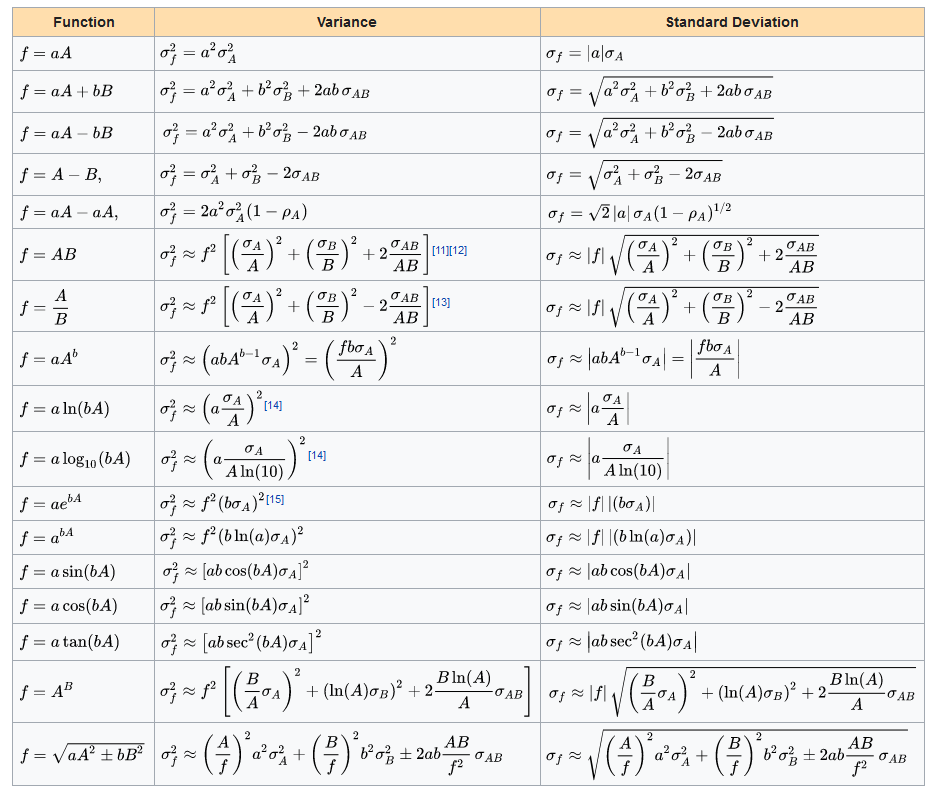

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

D = 0.0060  # m, tube diameter
rho = 1.2  # kg/m^3, air density
mu = 1.83e-5  # Pa s, air viscosity
rhow = 1000  # kg/m^3, water density
g = 9.8  # m/s^2, gravitational acceleration

v = 10.0
dh = 0.020
sigma_v = v*0.1
sigma_dh = dh*0.1

N = 10000

vMC = v + sigma_v * np.random.normal(size=N)
dhMC = dh + sigma_dh * np.random.normal(size=N)

ReMC = vMC * D * rho / mu
PMC = rhow * g * dhMC
fMC = PMC / (2 * rho * vMC**2 * (0.50 / D))

# Calculate the 95% confidence interval for fMC
fMC_mean = np.mean(fMC)
fMC_std = np.std(fMC, ddof=1)  # Sample standard deviation
confidence_level = 0.95
t_value = t.ppf((1 + confidence_level) / 2, df=len(fMC) - 1)  # t-value for 95% CI

# Confidence interval
fMC_ci_lower = fMC_mean - t_value * fMC_std / np.sqrt(len(fMC))
fMC_ci_upper = fMC_mean + t_value * fMC_std / np.sqrt(len(fMC))

print(f"Mean fMC: {fMC_mean:.5f}")
print(f"95% Confidence Interval: [{fMC_ci_lower:.5f}, {fMC_ci_upper:.5f}]")

fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

axes[0].hist(ReMC, bins=50, color='tab:blue', alpha=0.7, edgecolor='black')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].set_title("Reynolds number (Re)", pad=20)
axes[0].set_xlabel("Re")
axes[0].set_ylabel("Frequency")

axes[1].hist(PMC, bins=50, color='tab:green', alpha=0.7, edgecolor='black')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].set_title("Pressure (P)", pad=20)
axes[1].set_xlabel("Pressure (P)")
axes[1].set_ylabel("Frequency")

axes[2].hist(fMC, bins=50, color='tab:orange', alpha=0.7, edgecolor='black')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[2].set_title("Friction factor (f)", pad=20)
axes[2].set_xlabel("Friction Factor (f)")
axes[2].set_ylabel("Frequency")

plt.show()

*Error propagation analysis using the Monte Carlo method is not perfect because it assumes that the errors between parameters are independent and normally distributed. However, the method is very straightforward to implement.*